# Linear Discriminant Analysis 

This method is statistical technique utilized for forecasting a single categorical variable based on one or more continuous variables, separating the samples into two or more classes that are based on distance through one or many decision boundaries. It is also utilized to determine the numeric association between sets of these variables. It enables us to determine the probability of an observation belonging to a specific class based on the predictor value associated with the observation. To apply this method, the variable you aim to predict must be categorical (like `subscription`). The data must adhere to the additional assumptions stated below to ensure the validity and accuracy of this model:

* **Linearity**: Logistic regression, which is used in LDA, assumes a linear relationship between the natural log of probabilities (expressed as odds) and predictor variables.

* **No Outliers: Outliers**: Data points with exceptionally large or small values, should not be present in the variables of interest.

* **Independence**: Each observation or data point should be independent of others. In cases where multiple data points are collected over time from the same unit of observation, this assumption may be violated due to potential relatedness or influence among the data points.

* **No Multicollinearity**: Multicollinearity occurs when two or more independent variables are highly correlated. This can lead to instability and reduced reliability of regression coefficients and statistical significance, although it does not affect the overall fit of the model.

* **Homoscedasticity**: This means that the variability of the variables should be consistent throughout their respective ranges.

* **Normality**: Assumes the distributions of the variables follow a normal (bell curve) distribution shape.

In the following section, Quadratic Discriminant Analysis (QDA) will be discussed in further detail.

## Libraries

In [43]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, power_transform, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)

## Import Data 

In [44]:
# Read in all the CSV files for train, validation, and test
X_train = pd.read_csv('0_X_train.csv', index_col = 'Id')
X_valid = pd.read_csv('1_X_valid.csv', index_col = 'Id')
X_test  = pd.read_csv('2_X_test.csv', index_col = 'Id')

y_train = pd.read_csv('0_y_train.csv', index_col = 'Id')
y_valid = pd.read_csv('1_y_valid.csv', index_col = 'Id')
y_test  = pd.read_csv('2_y_test.csv', index_col = 'Id')

X = pd.concat([X_train, X_valid, X_test], axis=0)
y = pd.concat([y_train, y_valid, y_test], axis=0)

num_vars = ['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']

Immediately, our possible models for LDA and QDA are reduced since we can only use continuous variables to predict the response, $y$.

In [45]:
# Keep only the continuous variables for LDA and QDA
X_train = X_train[['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']]

X_valid = X_valid[['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']]

X_test = X_test[['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']]

X = X[['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']]

Text(0.5, 1.0, 'Correlation Matrix')

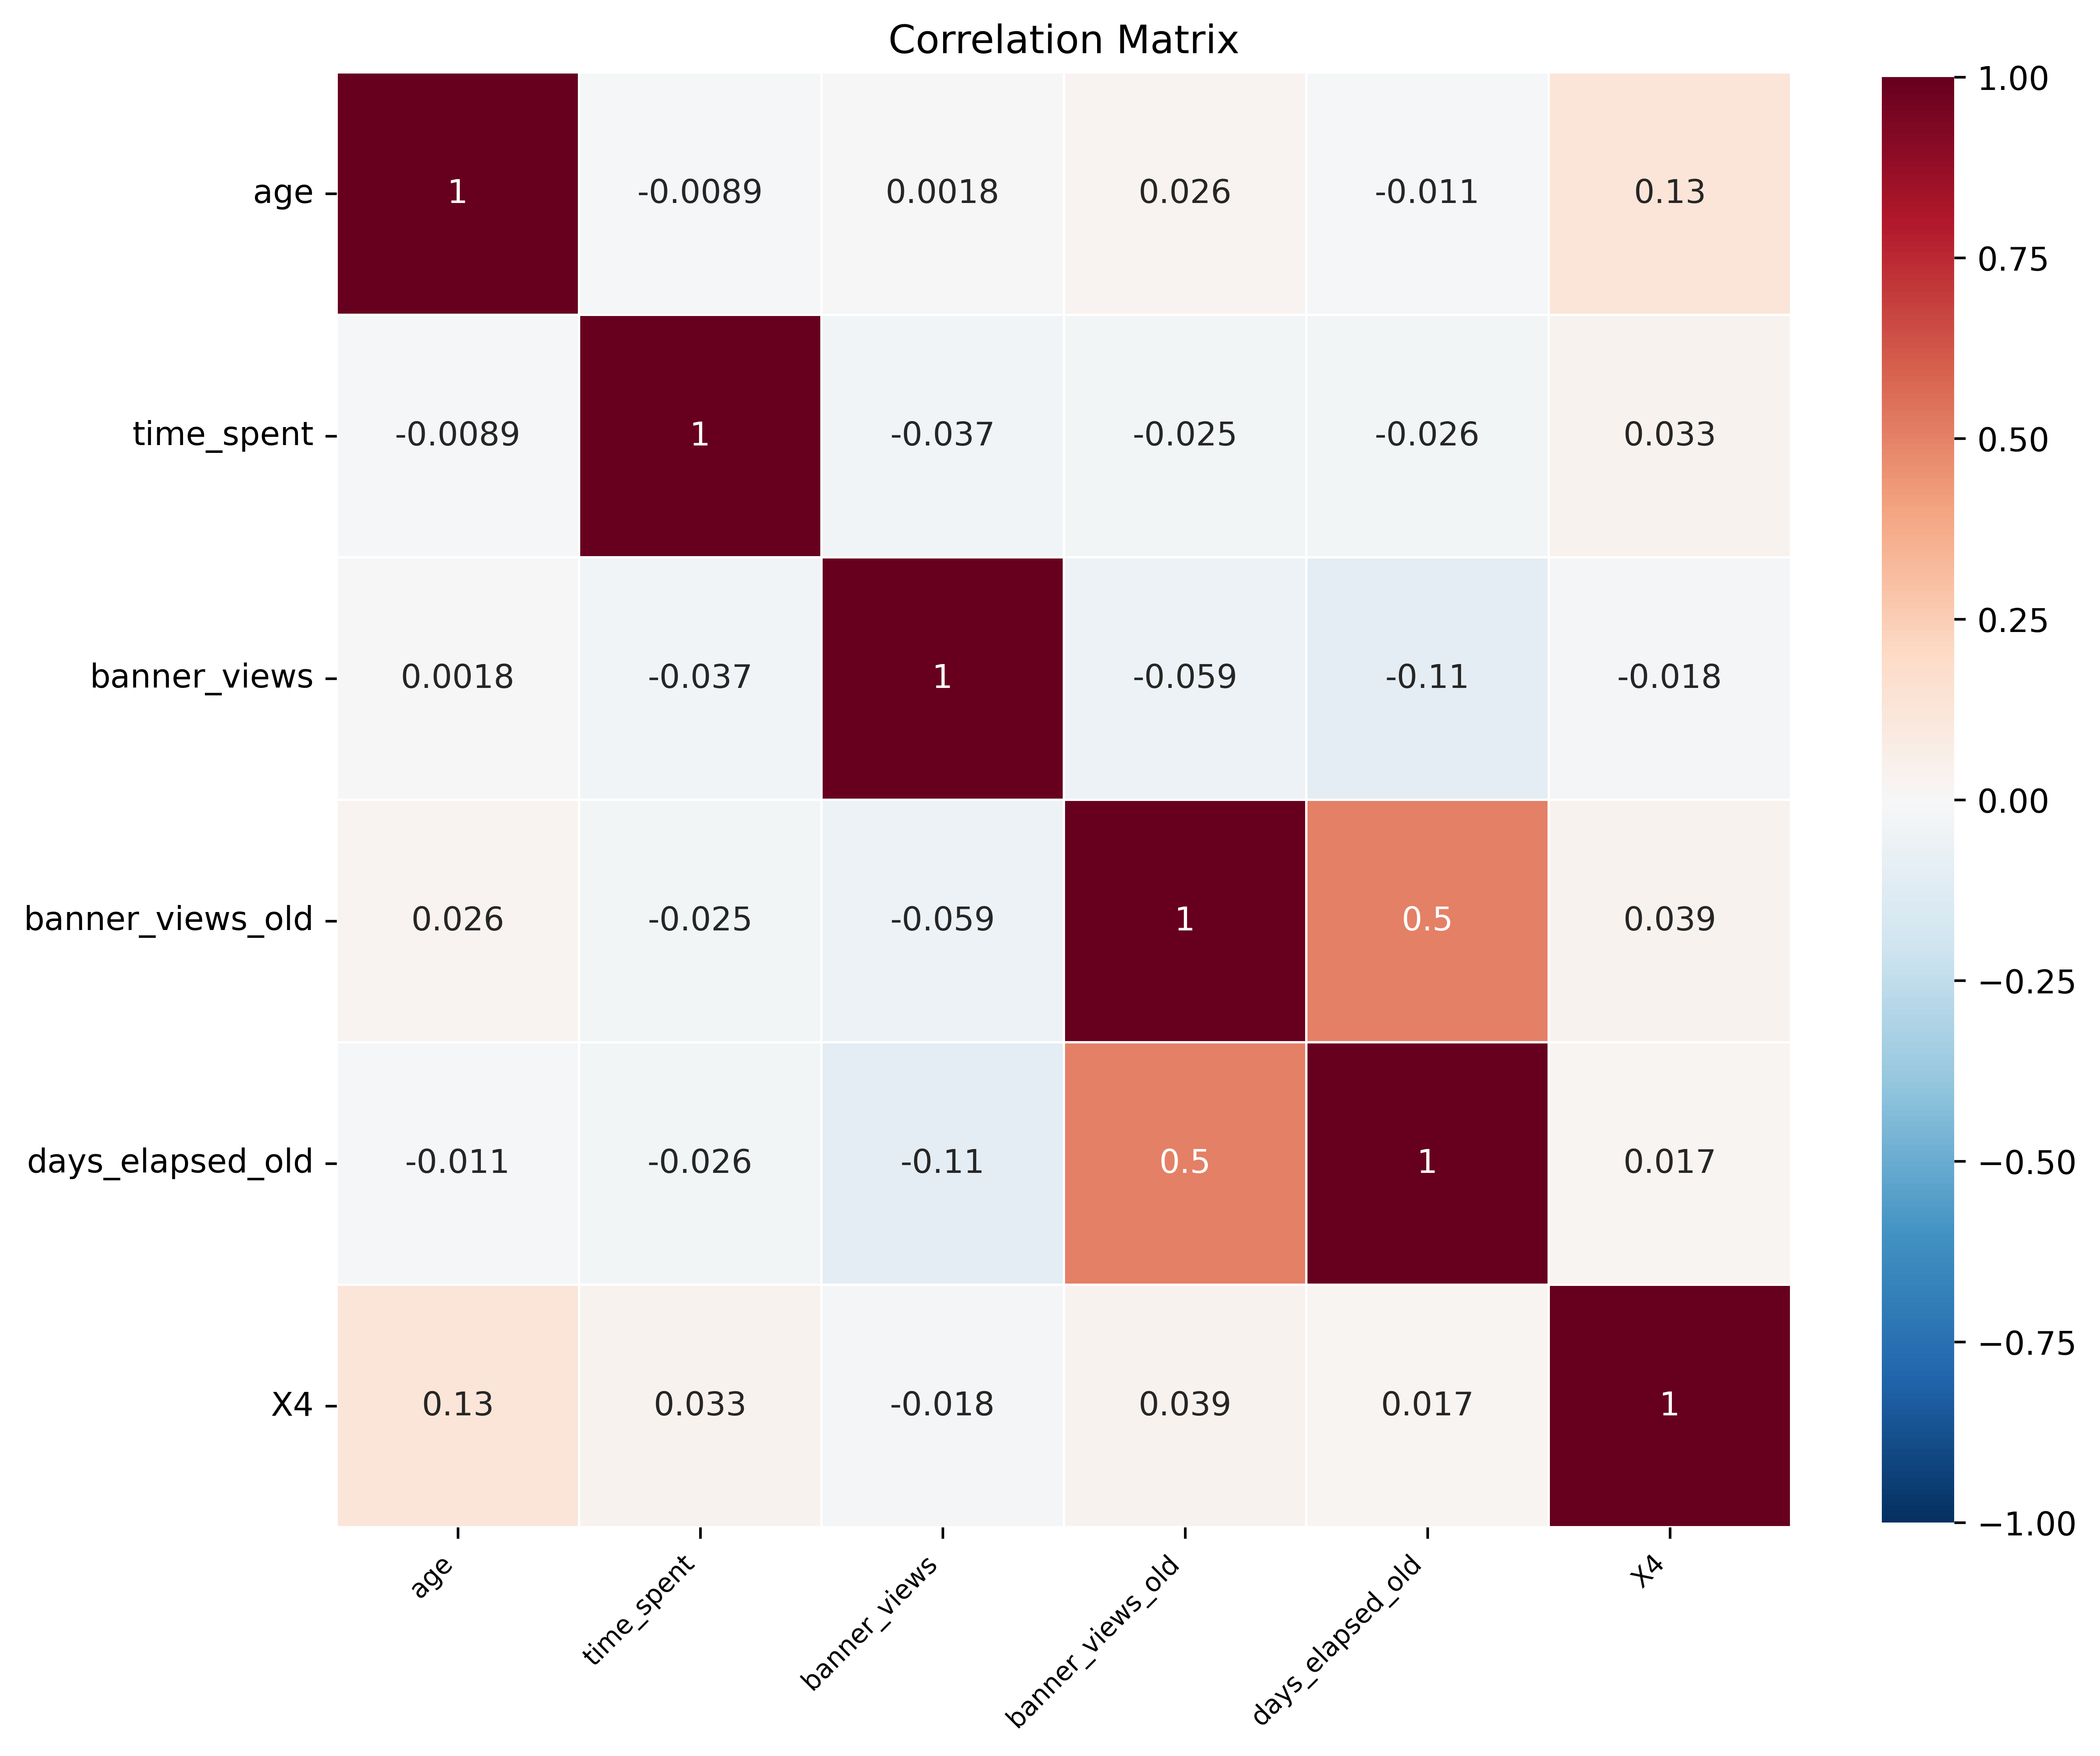

In [46]:
# Correlation matrix for only continuous predictors
corr_matrix = X_train_continous.corr()

# Plot correlation matrix
plt.figure(figsize = (10, 10), dpi = 600)
g = sns.heatmap(corr_matrix, square = True,
            center = 0, annot = True, linewidths = .5,
            cmap = "RdBu_r", cbar_kws = {"shrink": 0.8}, vmin = -1, vmax = 1);
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 8, ha = 'right')
plt.title('Correlation Matrix')

The highest correlation between variables is `days_elapsed_old` and `banner_views_old` at 50%, possibly indicating a strong relatonship. This could hinder the independence assumption.

In [47]:
# Create a numpy array for y_train so that the methods can appropriately read the data
y_train = np.array(y_train)
y_train = y_train.ravel()

# Create a numpy array for y_train so that the methods can appropriately read the data
y = np.array(y)
y = y.ravel()

## LDA Models

In [48]:
# With the pipeline ...
# Define pipeline
pipe_lda = Pipeline(
    [("scaler", StandardScaler()), 
     ("lda", LinearDiscriminantAnalysis())]
)
# Pipeline consists of two steps (treating as a single object):
#  1. StandardScaler: This step applies the standard scaling technique to the input features. 
#  Standard scaling scales each feature to have zero mean and unit variance, which is a common preprocessing step for many machine learning algorithms.
#  2. LinearDiscriminantAnalysis: Performs linear discriminant analysis, a technique for dimensionality reduction and classification. 
#  It aims to find a lower-dimensional representation of the data that maximizes the separation between different classes in the data.

In [49]:
# Fit pipeline
pipe_lda.fit(X_train, y_train) # Fit it to the training data 

# Predict on training data
y_train_pred = pipe_lda.predict(X_train) # Predict the class labels for the training data
acc1 = accuracy_score(y_train, y_train_pred) # Calculate the accuracy of the predictions 

# Predict on valid data
y_valid_pred = pipe_lda.predict(X_valid) # Predict the class labels for the training data
acc2 = accuracy_score(y_valid, y_valid_pred) # Calculate the accuracy of the predictions 

# Predict on test data
y_test_pred = pipe_lda.predict(X_test) # Predict the class labels for the test data
acc3 = accuracy_score(y_test, y_test_pred) # Calculate the accuracy of the predictions 

# Predict pipeline to X training (full) data
y_X_pred = pipe_lda.predict(X) # Predict the class labels for the X data
acc4 = accuracy_score(y, y_X_pred) # Calculate the accuracy of the predictions 

# Fit pipeline to full training X data
pipe_lda.fit(X, y) # Fit it to the full X training data 

# Predict pipeline to X training (full) data
y_XX_pred = pipe_lda.predict(X) # Predict the class labels for the X data
acc5 = accuracy_score(y, y_XX_pred) # Calculate the accuracy of the predictions 

print("LDA Best Model")
print("")
print("Training accuracy:",  np.round(acc1, 4))
print("Validation accuracy:", np.round(acc2, 4))
print("Test accuracy:", np.round(acc3, 4))
print("X accuracy on Partially Trained Model:", np.round(acc4, 4))
print("X accuracy on Fully Trained Model:", np.round(acc5, 4))

LDA Best Model

Training accuracy: 0.748
Validation accuracy: 0.7297
Test accuracy: 0.7506
X accuracy on Partially Trained Model: 0.7456
X accuracy on Fully Trained Model: 0.747


# Quadratic Discriminant Analysis 
The extension of LDA is QDA, which differs in the fact that this method assumes different covariance matrices for each class. Instead of linear decision boundaries like LDA had, we now use quadratic questions in $x$. This allows for more flexiblity. However, there are more parameters to estimate. 

In [50]:
# QDA
# A classification algorithm that assumes the data follows a Gaussian distribution and estimates separate covariance matrices for each class. 
# It is a type of discriminant analysis that is particularly useful when the classes have non-linear decision boundaries.

# Define pipeline
pipe_qda = Pipeline(
    [("scaler", StandardScaler()), 
     ("qda", QuadraticDiscriminantAnalysis())]
)
# Pipeline consists of two steps (treating as a single object):
#  1. StandardScaler: This step applies the standard scaling technique to the input features. 
#  Standard scaling scales each feature to have zero mean and unit variance, which is a common preprocessing step for many machine learning algorithms.
#  2. QuadraticDiscriminantAnalysis: This step fits a QDA model to the scaled data.

In [51]:
# Fit pipeline
pipe_qda.fit(X_train, y_train) # Fit it to the training data 

# Predict on training data
y_train_pred = pipe_qda.predict(X_train) # Predict the class labels for the training data
acc1 = accuracy_score(y_train, y_train_pred) # Calculate the accuracy of the predictions 

# Predict on valid data
y_valid_pred = pipe_qda.predict(X_valid) # Predict the class labels for the training data
acc2 = accuracy_score(y_valid, y_valid_pred) # Calculate the accuracy of the predictions 

# Predict on test data
y_test_pred = pipe_qda.predict(X_test) # Predict the class labels for the test data
acc3 = accuracy_score(y_test, y_test_pred) # Calculate the accuracy of the predictions 

# Predict pipeline to X training (full) data
y_X_pred = pipe_qda.predict(X) # Predict the class labels for the X data
acc4 = accuracy_score(y, y_X_pred) # Calculate the accuracy of the predictions 

# Fit pipeline to full training X data
pipe_qda.fit(X, y) # Fit it to the full X training data 

# Predict pipeline to X training (full) data
y_XX_pred = pipe_qda.predict(X) # Predict the class labels for the X data
acc5 = accuracy_score(y, y_XX_pred) # Calculate the accuracy of the predictions 

print("QDA Best Model")
print("")
print("Training accuracy:",  np.round(acc1, 4))
print("Validation accuracy:", np.round(acc2, 4))
print("Test accuracy:", np.round(acc3, 4))
print("X accuracy on Partially Trained Model:", np.round(acc4, 4))
print("X accuracy on Fully Trained Model:", np.round(acc5, 4))

QDA Best Model

Training accuracy: 0.7244
Validation accuracy: 0.7081
Test accuracy: 0.7036
X accuracy on Partially Trained Model: 0.7188
X accuracy on Fully Trained Model: 0.724


### Resources

* https://www.datasklr.com/select-classification-methods/linear-and-quadratic-discriminant-analysis

* https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html 

* https://online.stat.psu.edu/stat508/lesson/9/9.2/9.2.8

* https://www.statstest.com/linear-discriminant-analysis/

* https://towardsdatascience.com/linear-discriminant-analysis-explained-f88be6c1e00b 

* 10_LDA_and_QDA.pdf